In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

df = pd.read_csv('Dataframes/3rdBodyPerturbationPoliastro.csv')

df

,x,y,z
0,42159.783600,0.000000,0.000000
1,39159.545914,15563.916303,266.913399
2,30572.229294,28909.053086,496.928223
3,17596.068412,38144.740319,671.356184
4,2068.446366,41949.706443,775.646554
...,...,...,...
995,38132.961517,21370.880108,-7532.333000
996,31399.515894,31233.289707,1828.575655
997,20906.077447,37238.565267,10967.804062
998,7871.245318,38575.122415,18731.818721


Now we want to predict X values (can change for Y, Z):

In [2]:
#Create a new dataframe with only the x column
data = df.filter(['x']) # CHANGE FOR Y,Z

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * 0.8 ))

training_data_len

800

In [3]:
train=dataset[0 : training_data_len]
test=dataset[training_data_len - 60 : ]

In [4]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train)
test_data=scaler.transform(test)

In [5]:
#Create the training data set
#Create the scaled training data set

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
#Create the testing data set
#Create a new array containing scaled values
#test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test

x_test = []
#y_test = dataset[training_data_len:, :]
y_test = dataset[training_data_len : ]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [7]:
x_train.shape

(740, 60, 1)

In [8]:
x_test.shape

(200, 60, 1)

In [9]:
y_test.shape

(200, 1)

Model 1:

Epoch 1/100
3/3 [==============================] - 0s 131ms/step - loss: 0.3072
Epoch 2/100
3/3 [==============================] - 0s 120ms/step - loss: 0.1586
Epoch 3/100
3/3 [==============================] - 0s 121ms/step - loss: 0.1489
Epoch 4/100
3/3 [==============================] - 0s 109ms/step - loss: 0.1379
Epoch 5/100
3/3 [==============================] - 0s 121ms/step - loss: 0.1383
Epoch 6/100
3/3 [==============================] - 0s 106ms/step - loss: 0.1246
Epoch 7/100
3/3 [==============================] - 0s 111ms/step - loss: 0.1160
Epoch 8/100
3/3 [==============================] - 0s 116ms/step - loss: 0.1122
Epoch 9/100
3/3 [==============================] - 0s 116ms/step - loss: 0.1026
Epoch 10/100
3/3 [==============================] - 0s 109ms/step - loss: 0.0930
Epoch 11/100
3/3 [==============================] - 0s 112ms/step - loss: 0.0831
Epoch 12/100
3/3 [==============================] - 0s 112ms/step - loss: 0.0665
Epoch 13/100
3/3 [===================

<AxesSubplot:>

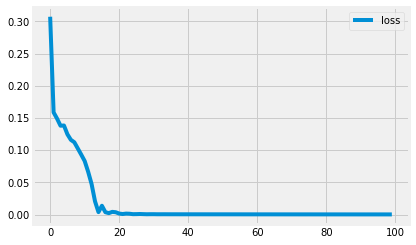

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
# Note: replace LSTM with GRU or RNN if you want to try those
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1))) # input_shape = (60,1)
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=256, epochs=100) #add validation set?

# Plot losses
losses = pd.DataFrame(model.history.history)
losses[['loss']].plot()

Model 2:

In [11]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

969.1061958137727

**How to write output DATAFRAME:**

### Plot:

C:\Users\Vlad\anaconda3\envs\poliastro\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


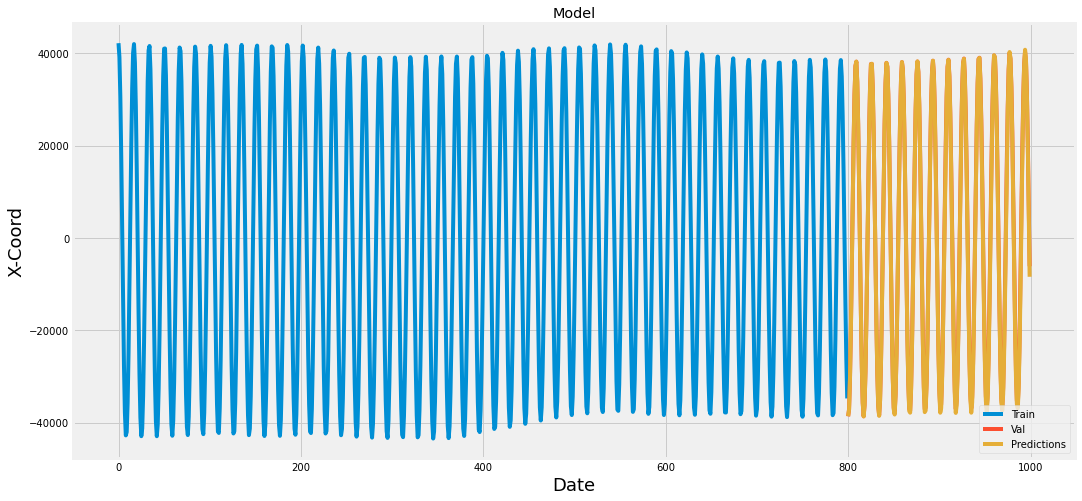

In [12]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('X-Coord', fontsize=18)
plt.plot(train['x'])
plt.plot(valid[['x', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### Errors:

In [13]:
valid['Error']=abs(valid.Predictions-valid.x)/6738 # the normalization ct is taken as ISS semi-major axis

C:\Users\Vlad\anaconda3\envs\poliastro\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

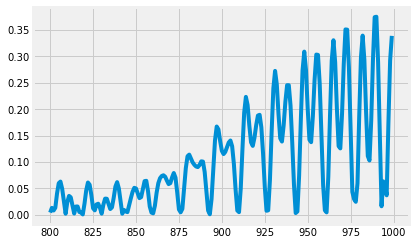

In [14]:
valid.Error.plot()